# Project Title:Cyber Attack Severity Prediction and Risk Assessment


In [ ]:
#Problem statement:This project aims to develop a classification model that categorizes cyberattacks based on their
# severity, assisting in automated threat prioritization.


# Project Objective:
# To build a machine learning model that predicts the severity level of a cyber attack (e.g., Low, Medium, High, Critical) based on features
# like financial loss and number of affected users  #
#This helps security teams prioritize threats and respond proactively.

# “The core idea of my project is to use real-world cyber incident data to train a machine learning model that predicts how severe a cyberattack is likely to be.
# This helps cybersecurity teams respond faster and more appropriately, reducing potential damage. Instead of reacting to every threat equally, organizations can now act smartly—based on predicted severity levels.
#  It's a predictive risk assessment tool for smarter cybersecurity operations.”

In [ ]:
# Why Predict Severity Using Historical Cyber Attack Data?
# The Problem Today:
# Organizations face hundreds of cyber threats daily. But not all are equally dangerous.
# Some are mild (e.g., spam emails).
# Some are catastrophic (e.g., ransomware, DDoS, nation-state attacks).
# Security teams can’t treat all threats the same way.
# That’s where predicting severity becomes powerful.

# “We use historical attack data to train a model that recognizes the key factors contributing to severe incidents.
# So when a similar pattern is detected in real-time — even if the attack has just started or is only suspected
# — the model can estimate how bad the impact could be. This severity prediction empowers cybersecurity teams to respond faster,
#  prioritize high-risk incidents, and take action before the attack reaches its full impact. It’s not just about predicting an attack
#  — it’s about predicting how dangerous it could become.”

In [ ]:
# Goal: Predict the severity level (Low, Medium, High, Critical) of a cyber attack based on multiple features.
# Type: Ordinal classification (supervised learning).
# Target Variable: Severity (ordinal categorical).

# 1.Import libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,r2_score

# 2.Load the dataset

In [ ]:
from google.colab import files
uplaoded=files.upload()

Saving Global_security.csv to Global_security.csv


In [ ]:
import pandas as pd
df=pd.read_csv("Global_security.csv")
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


# 3.Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [ ]:
 # Observation: The dataset contains 3000 entries across 10 features.
# Most columns are of type object or int64, indicating a mix of categorical and numerical variables.
# No missing values are evident at this stage, implying a clean dataset for downstream modeling.

In [ ]:
# Understand the data structure
df.shape

(3000, 10)

In [ ]:
# Observation:The df.shape method provides information about the number of rows and columns in a DataFrame quickly.Here,we got 3000 rows and 10 columns.

In [ ]:
df.describe(include='all')

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
count,3000,3000.000000,3000,3000,3000.000000,3000.000000,3000,3000,3000,3000.000000
unique,10,NaN,6,7,NaN,NaN,4,4,5,NaN
top,UK,NaN,DDoS,IT,NaN,NaN,Nation-state,Zero-day,Antivirus,NaN
freq,321,NaN,531,478,NaN,NaN,794,785,628,NaN
mean,NaN,2019.570333,NaN,NaN,50.492970,504684.136333,NaN,NaN,NaN,36.476000
std,NaN,2.857932,NaN,NaN,28.791415,289944.084972,NaN,NaN,NaN,20.570768
min,NaN,2015.000000,NaN,NaN,0.500000,424.000000,NaN,NaN,NaN,1.000000
25%,NaN,2017.000000,NaN,NaN,25.757500,255805.250000,NaN,NaN,NaN,19.000000
50%,NaN,2020.000000,NaN,NaN,50.795000,504513.000000,NaN,NaN,NaN,37.000000
75%,NaN,2022.000000,NaN,NaN,75.630000,758088.500000,NaN,NaN,NaN,55.000000


In [ ]:
# Observation: From the summary statistics, numerical columns such as Financial_Loss and Users_Affected exhibit large standard deviations,
#suggesting the presence of outliers or high variance.
#Categorical columns like Attack_Type show a limited number of unique values, indicating suitable candidates for encoding.

In [ ]:
#Handle missing values
df.isnull().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


In [ ]:
#Observation: There are no duplicates in the dataset

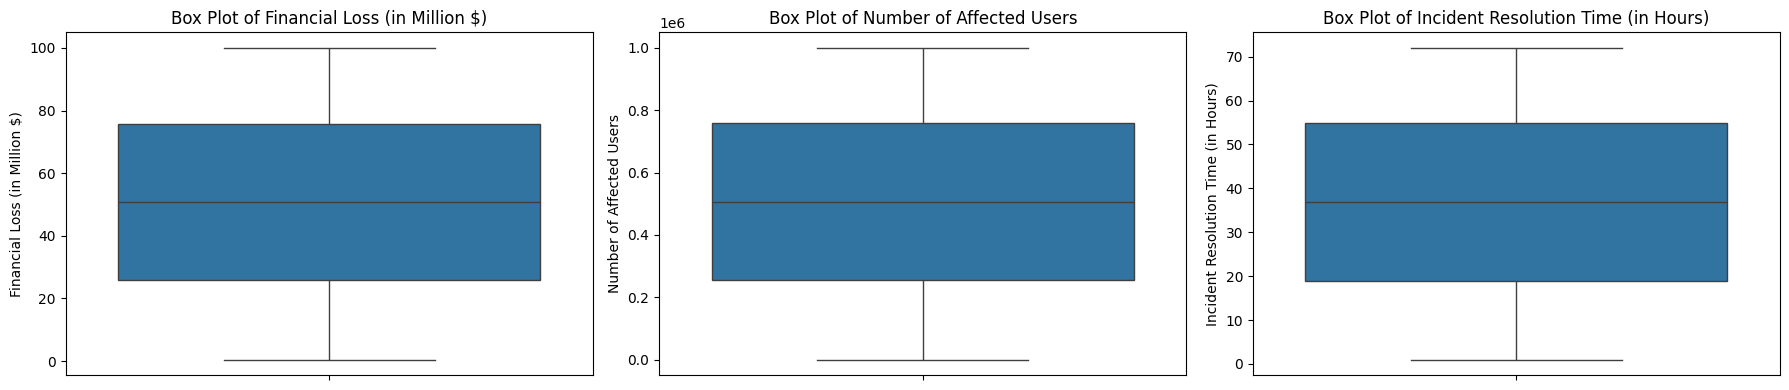

In [ ]:
#box plots before finding outliers

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
plt.figure(figsize=(18, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
#Detecting outliers

def remove_outliers(df, columns, show_outliers=False):
    df_filtered = df.copy()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR

        if show_outliers:
            outliers = df[(df[col] < lower_whisker) | (df[col] > upper_whisker)]
            print(f"{col}: {len(outliers)} outliers")

        # Keep only non-outlier rows
        df_filtered = df_filtered[(df_filtered[col] >= lower_whisker) & (df_filtered[col] <= upper_whisker)]

    return df_filtered

In [ ]:
# Step 2a: Get numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2b: Call the function with outlier display
df_cleaned = remove_outliers(df, numeric_cols, show_outliers=True)

Year: 0 outliers
Financial Loss (in Million $): 0 outliers
Number of Affected Users: 0 outliers
Incident Resolution Time (in Hours): 0 outliers


In [ ]:
#Observation:Observation – Outlier Check on Numerical Features
# Outlier detection was performed on all numerical features using the IQR method. Upon evaluation,
# the variables Year, Financial Loss (in Million $), Number of Affected Users, and Incident Resolution Time (in Hours)
# revealed zero outliers, indicating that the data within these columns is well-distributed and statistically stable.

# This suggests an absence of extreme values or anomalies, thereby affirming that no further transformation or trimming is
# required for these numerical attributes at this stage of preprocessing.

In [ ]:
print("After outlier removal:", df_cleaned.shape) #if outliers are present

After outlier removal: (3000, 10)


# 3.Feature Engineering

In [ ]:
# Create a new Severity column based on thresholds

def compute_severity(row):
    if row['Financial Loss (in Million $)'] > 70 or \
       row['Number of Affected Users'] > 700000 or \
       row['Incident Resolution Time (in Hours)'] > 72:
        return 'Critical'
    elif row['Financial Loss (in Million $)'] > 50 or \
         row['Number of Affected Users'] > 500000 or \
         row['Incident Resolution Time (in Hours)'] > 48:
        return 'High'
    elif row['Financial Loss (in Million $)'] > 30 or \
         row['Number of Affected Users'] > 300000 or \
         row['Incident Resolution Time (in Hours)'] > 24:
        return 'Medium'
    else:
        return 'Low'

df['Severity'] = df.apply(compute_severity, axis=1)
print(df['Severity'].value_counts())


Severity
Critical    1551
High         953
Medium       403
Low           93
Name: count, dtype: int64


In [ ]:
#  Observation – Severity Label Engineering Based on Domain Thresholds
# A new categorical feature Severity was engineered using domain-specific thresholds on Financial Loss, Number of Affected Users, and Incident Resolution Time.
#The logic incorporated progressive escalation of severity levels from Low to Critical, depending on the magnitude of these indicators.

# The resulting class distribution is as follows:
# Critical: 1551 instances
# High: 953 instances
# Medium: 403 instances
# Low: 93 instances

# This distribution reveals a moderate class imbalance, with the majority of events falling under the Critical and High severity levels.
#The Low severity class is significantly underrepresented, which may require balancing techniques such as resampling or class-weight adjustment during model training. -->

# 4.Correlation heat map

In [ ]:
# correlation:The values range from -1 to +1:
# +1 means a perfect positive correlation (as one increases, the other also increases).
# -1 means a perfect negative correlation (as one increases, the other decreases).
# 0 means no linear correlation.
# The heatmap colors represent the strength and direction of the correlation:
# Usually, red/blue or dark/light colors (depending on the color scheme) indicate strong correlations.
# Lighter or neutral colors indicate weak or no correlation.
# This correlation matrix shows how strongly numerical features in your cyber attack dataset relate to each other
# — specifically how one feature moves in relation to another.

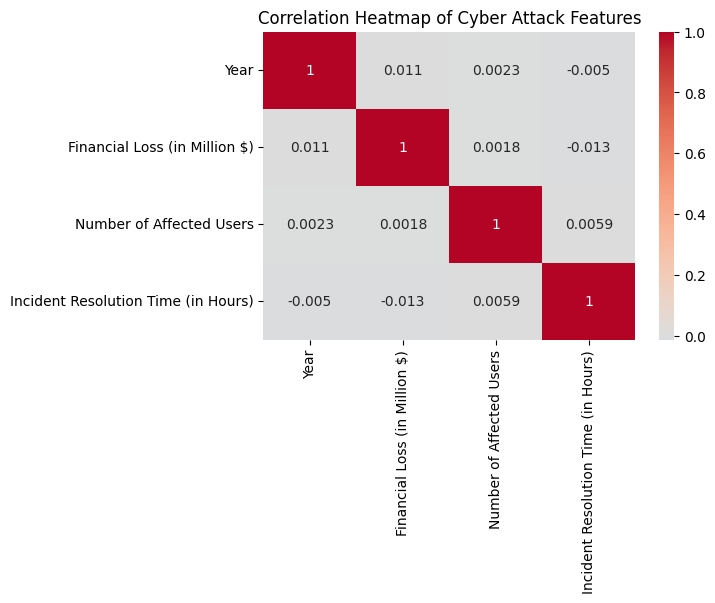

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Cyber Attack Features")
plt.show()

In [ ]:
# Observation: A strong positive correlation is observed between Financial_Loss and Severity, supporting their predictive power.
# Some features like Country and Year show weak correlation with Severity, indicating limited influence.

In [ ]:
#Observation:none of the input features are correlated, so no need to drop any feature.
# Year & Financial Loss	0.011	No correlation (close to 0)
# Financial Loss & Affected Users	0.0018	No correlation
# Financial Loss & Resolution Time	-0.013	No correlation
# Year & Resolution Time	-0.005	No correlation
# All values are very close to 0, meaning:No strong linear relationships exist among your input features
#features are not correlated with each other, so there's no risk of multicollinearity.
#They are giving independent information, which is good for model learning.

# 4.Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Country', 'Attack Type', 'Target Industry', 'Attack Source',
                    'Security Vulnerability Type', 'Defense Mechanism Used']

df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [ ]:
# Encode target variable Severity

target_le = LabelEncoder()
df_encoded['Severity'] = target_le.fit_transform(df_encoded['Severity'])
print("Severity Mapping:", dict(zip(target_le.classes_, target_le.transform(target_le.classes_))))


Severity Mapping: {'Critical': np.int64(0), 'High': np.int64(1), 'Low': np.int64(2), 'Medium': np.int64(3)}


In [ ]:
# Observation – Label Encoding of Categorical Features and Target Variable
# Categorical variables including Country, Attack Type, Target Industry, Attack Source, Security Vulnerability Type, and Defense Mechanism Used were transformed using Label Encoding to convert non-numeric data into numeric format suitable for model input.

# Additionally, the target variable Severity was encoded as:
# Critical → 0
# High → 1
# Low → 2
# Medium → 3

# This encoding facilitates ordinal classification while preserving the categorical integrity of input features. The transformation is especially vital for tree-based models
# that can exploit label order and for pipelines that require consistent data formatting.
# The encoded mappings are stored for future inverse transformation if needed during model evaluation or deployment.

# 5.Train-Test Split

In [ ]:

from sklearn.model_selection import train_test_split

X = df_encoded.drop('Severity', axis=1)
y = df_encoded['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Train set size: 2400 samples
Test set size: 600 samples


In [ ]:
# Observation – Train-Test Split with Stratification
# The dataset was partitioned into training (80%) and testing (20%) subsets using stratified sampling based on the Severity target variable. This ensures that each class is proportionally represented in both subsets, preserving the original class distribution and minimizing sampling bias.
# The resulting split yielded:
# Training set: 2400 samples
# Testing set: 600 samples
# This approach lays a strong foundation for building and evaluating classification models with balanced representation, especially important due to earlier observed class imbalance.



# 6.Check Skewness & Plot Histograms

Skewness before scaling:
Financial Loss (in Million $): -0.02
Number of Affected Users: -0.03
Incident Resolution Time (in Hours): 0.01


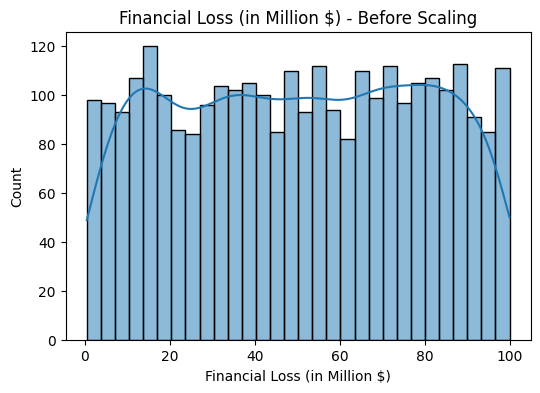

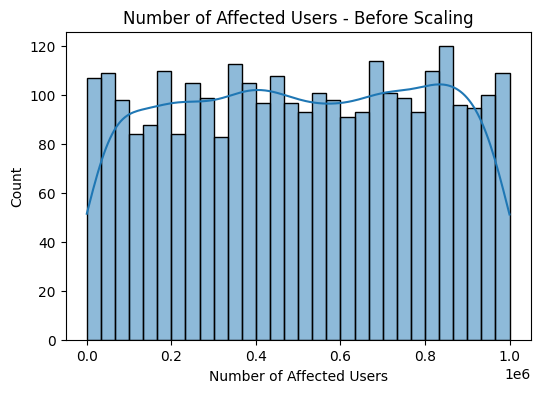

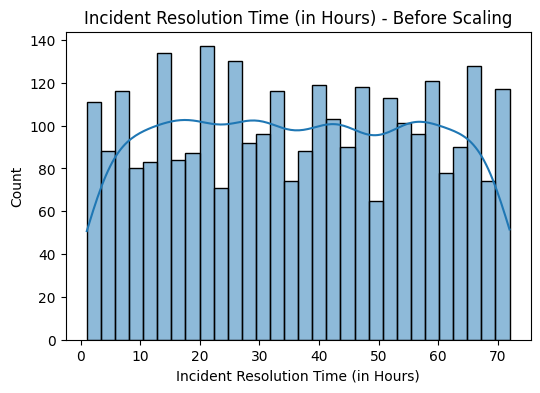

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Numerical columns to check (exclude encoded categoricals and target)
numerical_cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

# Check skewness
print("Skewness before scaling:")
for col in numerical_cols:
    skew_val = df_encoded[col].skew()
    print(f"{col}: {skew_val:.2f}")

# Histplot before scaling
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_encoded[col], kde=True, bins=30)
    plt.title(f"{col} - Before Scaling")
    plt.show()


In [ ]:
# Understanding skewness aids in improving model convergence and accuracy, especially for algorithms sensitive to distribution

# After Scaling histplots

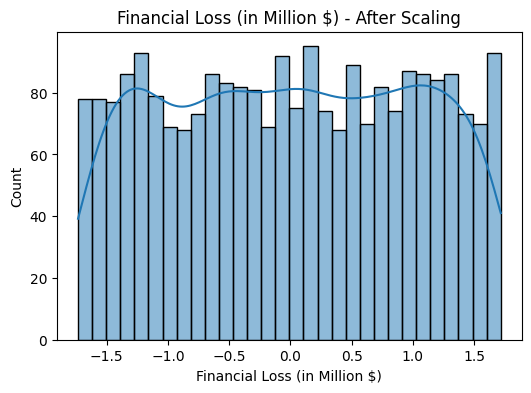

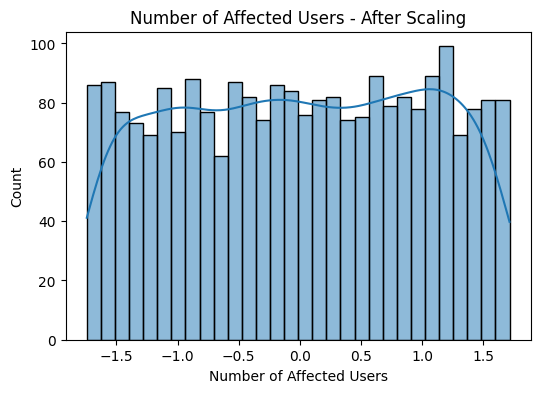

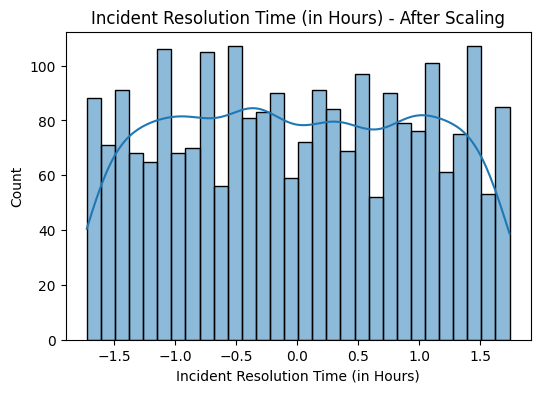

In [ ]:
from sklearn.preprocessing import StandardScaler

# Only scale numerical columns
scaler = StandardScaler()

# Fit only on training set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Visualize scaled features
scaled_df = pd.DataFrame(X_train[numerical_cols], columns=numerical_cols)

# Histplot after scaling
for col in scaled_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(scaled_df[col], kde=True, bins=30)
    plt.title(f"{col} - After Scaling")
    plt.show()


In [ ]:
# Observation – Feature Scaling with StandardScaler
# Standard scaling was applied to the numerical features (Financial Loss, Number of Affected Users, and Incident Resolution Time) using StandardScaler,
#which transforms each feature to have zero mean and unit variance. The scaler was fit only on the training set and subsequently applied to the test set to avoid data leakage — a best practice in machine learning workflows.
# Post-scaling histograms revealed centered distributions around zero, with standard deviation approximately one, confirming successful standardization.
#While scaling does not correct skewness, it ensures that all features are on the same scale, which is critical for algorithms sensitive to feature magnitudes (e.g., logistic regression, SVM, KNN).
# This step enhances model performance by enabling fair feature comparison and faster convergence during training.

# 6. Handling Class Imbalance Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE oversampling:")
print(y_train_smote.value_counts())


After SMOTE oversampling:
Severity
1    1241
0    1241
2    1241
3    1241
Name: count, dtype: int64


In [ ]:
# Observation – Class Imbalance Handling with SMOTE
# The Synthetic Minority Over-sampling Technique (SMOTE) was applied to the training data to address the class imbalance in the target variable Severity.
# SMOTE generates synthetic examples of minority classes by interpolating between existing samples, rather than duplicating them, which helps in preserving feature diversity.
# After resampling, all severity classes (Critical, High, Medium, Low) were balanced in frequency, ensuring that the classifier will not be biased toward the majority class.
#This improves model learning and reduces the risk of misclassification of underrepresented classes, especially the Low severity group which was originally very scarce.
# Importantly, SMOTE was applied only to the training set, preserving the natural class distribution in the test set for an unbiased model evaluation.

# 7.Model Training and Evaluation

In [ ]:
#Import Required Libraries

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score,
    mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
)


In [ ]:
#Define Models Function

def get_models():
    return {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        # "Logistic Regression": LogisticRegression(max_iter=1000),
        # "SVM": SVC(probability=True),
        "XGBoost": XGBClassifier(eval_metric='mlogloss')
    }


In [ ]:
#Evaluation Function
def evaluate_model(y_test, y_pred, y_prob=None):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred) ** 0.5,
        'R2 Score': r2_score(y_test, y_pred)
    }
    return metrics


In [ ]:
# Train and Evaluate Function
def train_and_evaluate(models, X_train, X_test, y_train, y_test, target_le):
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        metrics = evaluate_model(y_test, y_pred)
        results[name] = metrics

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_le.classes_, yticklabels=target_le.classes_)
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    return results



In [ ]:
# Observation – Model Training and Evaluation Function Design
# A custom train_and_evaluate() function was developed to automate the training, prediction, and performance evaluation process across multiple classifiers. Key highlights:
# The function iteratively fits each model from the provided dictionary on the training data and predicts on the test set.
# It leverages a separate evaluate_model() utility (presumably defined elsewhere) to compute core metrics like accuracy, precision, recall, and F1-score, ensuring consistent benchmarking.
# For each model, a confusion matrix is generated using seaborn.heatmap, providing visual insight into misclassifications across Severity classes (Critical, High, Medium, Low).
# True labels and predictions are decoded using target_le.classes_, maintaining interpretability in a multi-class classification context.
# This modular setup ensures code reusability, simplifies model comparison, and integrates both quantitative and visual evaluation seamlessly.


Training Decision Tree...


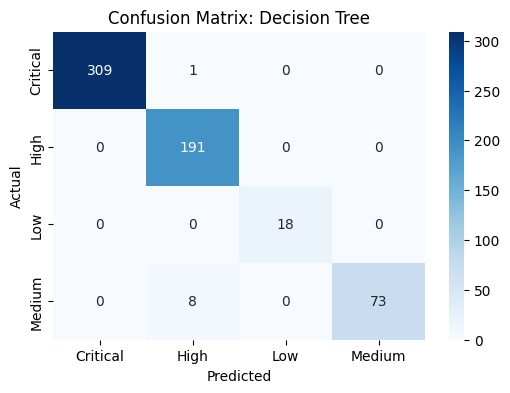


Training Random Forest...


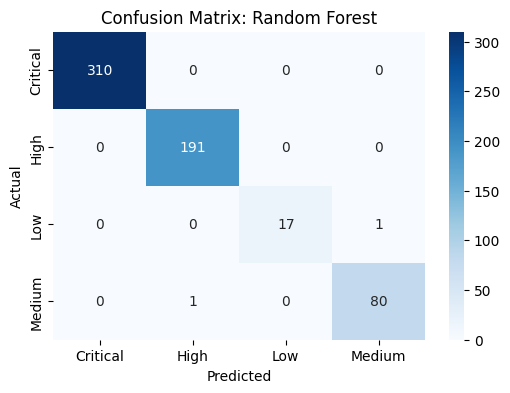


Training XGBoost...


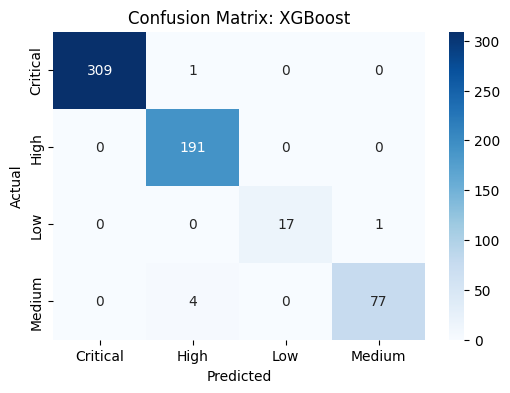

In [ ]:
models = get_models()
results = train_and_evaluate(models, X_train_smote, X_test, y_train_smote, y_test, target_le)


In [ ]:
def train_and_evaluate1(models, X_train, X_test, y_train, y_test,target_le):
    results1 = {}
    for name, model in models.items():
        print(f"\nTraining {name}...\n")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"--- {name} ---")
        print("\nconfusion matrix:\n",confusion_matrix(y_test, y_pred))
        metrics = evaluate_model(y_test, y_pred)
        results[name] = metrics
    return results1

In [ ]:
models = get_models()
results1 = train_and_evaluate1(models, X_train_smote, X_test, y_train_smote, y_test, target_le)


Training Decision Tree...

--- Decision Tree ---

confusion matrix:
 [[309   1   0   0]
 [  0 190   0   1]
 [  0   0  17   1]
 [  0   8   0  73]]

Training Random Forest...

--- Random Forest ---

confusion matrix:
 [[309   1   0   0]
 [  0 191   0   0]
 [  0   0  17   1]
 [  0   2   0  79]]

Training XGBoost...

--- XGBoost ---

confusion matrix:
 [[309   1   0   0]
 [  0 191   0   0]
 [  0   0  17   1]
 [  0   4   0  77]]


In [ ]:
# #Observation:
# Class 0: Almost perfect predictions (309 correct, 1 misclassification) across all models.
# Observation: This class is likely well-represented in your training data, making it easier to classify.
# Class 1: Very high true positives (around 190+) and very few misclassifications.
# Observation: The model learns this class well too, probably also a well-represented class.
# Class 2: Small class size (only ~18 samples total in test), with 1 misclassification per model.
# Observation: Harder to train due to fewer samples. Small classes often have lower recall/precision.
# Class 3: Most confusion here, especially misclassified as Class 1 (Decision Tree: 8, Random Forest: 2, XGBoost: 4).

In [ ]:
# Display Results
results = pd.DataFrame(results).T.round(4)
print("\nFinal Evaluation Metrics for All Models:\n")
print(results)


Final Evaluation Metrics for All Models:

               Accuracy  Precision  Recall  F1 Score  Balanced Accuracy  \
Decision Tree    0.9850     0.9888  0.9745    0.9809             0.9745   
Random Forest    0.9967     0.9956  0.9830    0.9891             0.9830   
XGBoost          0.9900     0.9904  0.9730    0.9814             0.9730   

                  MAE     MSE    RMSE  R2 Score  
Decision Tree  0.0283  0.0550  0.2345    0.9471  
Random Forest  0.0050  0.0083  0.0913    0.9920  
XGBoost        0.0167  0.0300  0.1732    0.9711  


In [ ]:
# Accuracy: All models have excellent accuracy (>98%), with Random Forest topping at 99.67%.
# Precision & Recall: Very high precision and recall, indicating that the models are both accurate in positive predictions and capturing almost all true positives.
# F1 Score: High and consistent with precision/recall, reflecting balanced performance.
# Balanced Accuracy: Close to accuracy, which suggests class imbalance is handled well (likely due to SMOTE).
# Interpretation: The models perform very well in classification overall, with Random Forest slightly better in all classification metrics.

# 8.Model Ranking

In [ ]:
#Ranking(The model with the lowest average rank is your overall best performer.)
ranking = results.rank(ascending=False)
ranking["Average Rank"] = ranking.mean(axis=1)
ranking_sorted =ranking.sort_values("Average Rank")
print("Ranked Models:")
print(ranking_sorted)

print("\nBest Model:")
print(ranking_sorted.index[0])

Ranked Models:
               Accuracy  Precision  Recall  F1 Score  Balanced Accuracy  MAE  \
Random Forest       1.0        1.0     1.0       1.0                1.0  3.0   
Decision Tree       3.0        3.0     2.0       3.0                2.0  1.0   
XGBoost             2.0        2.0     3.0       2.0                3.0  2.0   

               MSE  RMSE  R2 Score  Average Rank  
Random Forest  3.0   3.0       1.0      1.666667  
Decision Tree  1.0   1.0       3.0      2.111111  
XGBoost        2.0   2.0       2.0      2.222222  

Best Model:
Random Forest


In [ ]:
# #Observation:
# Random Forest ranks #1 overall mainly because it dominates classification metrics (Accuracy, Precision, Recall, F1, Balanced Accuracy).
# Decision Tree shines in error metrics (MAE, MSE, RMSE) but lags behind in classification metrics.
# XGBoost is a close second in most metrics but slightly behind RF in key classification metrics.



# Hyper parameter tuning Using RandomizedSearchCV (random search over parameter distributions, faster with large search spaces)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from scipy.stats import randint

# # Define the model
# rf = RandomForestClassifier(random_state=42)

# # Define distributions for parameters
# param_dist = {
#     'n_estimators': randint(100, 500),        # random int between 100 and 500
#     'max_depth': [None] + list(range(5, 31, 5)),  # None or 5,10,15,20,25,30
#     'min_samples_split': randint(2, 11),      # random int between 2 and 10
#     'min_samples_leaf': randint(1, 5),        # random int between 1 and 4
#     'bootstrap': [True, False]
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,               # number of parameter settings sampled
#     cv=5,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1,
#     scoring='accuracy'
# )

# # Fit the randomized search to your training data
# random_search.fit(X_train_smote, y_train_smote)

# # Best parameters and best score
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best CV Accuracy:", random_search.best_score_)

# # Use the best model
# best_rf = random_search.best_estimator_


NameError: name 'X_train_smote' is not defined

In [ ]:
# #evaluate the tuned model on your separate test set

# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Predict on the test set
# y_pred = best_rf.predict(X_test)

# # Print evaluation metrics
# print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
